<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support Vector Machine (SVM)
From **Avinash Navlani's Tutorial**.  See reference [1]
</br></br>


"Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes." [1]

**Support Vectors**
"Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier." [1]

**Hyperplane**
"A hyperplane is a decision plane which separates between a set of objects having different class memberships." [1]

**Margin**
"A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin." [1]


**How does SVM work?**
"The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure." [1]

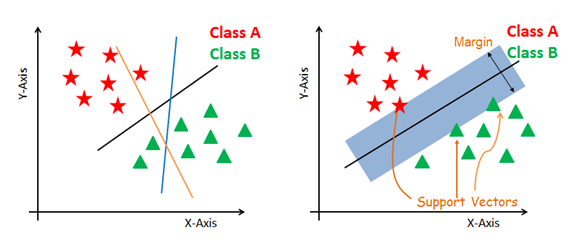

**Dealing with non-linear and inseparable planes**
"Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side)." [1]

"In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2=y^2). Now you can easily segregate these points using linear separation." [1]

**SVM Kernels:**
"The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier." [1]

**Linear Kernel:** 
"A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values." [1]

**K(x, xi) = sum(x * xi)**

**Polynomial Kernel:** 
"A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space." [1]

**K(x,xi) = 1 + sum(x * xi)^d**

"Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm." [1]

**Radial Basis Function Kernel:** 
"The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space." [1]

**K(x,xi) = exp(-gamma * sum((x – xi^2))**

"Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm." [1]

**Refernece:**

1.   https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
2.   https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/



**Pros and Cons associated with SVM**

*from Reference [2]*

**Pros:**

*   It works really well with a clear margin of separation
*   It is effective in high dimensional spaces.
*   It is effective in cases where the number of dimensions is greater than the number of samples.
*   It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient

**Cons:**


*   It doesn’t perform well when we have large data set because the required training time is higher.
*   It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
*   SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.  It is included in the related SVC method of Python scikit-learn library.

In [19]:
!pip install tslearn

     |████████████████████████████████| 793 kB 5.3 MB/s 


In [29]:
l = UCR_UEA_datasets().list_univariate_datasets()
print(l)

['Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'Car', 'CBF', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'DiatomSizeReduction', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxTW', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'GunPoint', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'InlineSkate', 'InsectWingbeatSound', 'ItalyPowerDemand', 'LargeKitchenAppliances', 'Lightning2', 'Lightning7', 'Mallat', 'Meat', 'MedicalImages', 'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxTW', 'MoteStrain', 'NonInvasiveFatalECGThorax1', 'NonInvasiveFatalECGThorax2', 'OliveOil', 'OSULeaf', 'PhalangesOutlinesCorrect', 'Phoneme', 'Plane', 'ProximalPhalanxOutlineCorrect', 'ProximalPhalanxOutlineAgeGroup', 'ProximalPhalanxTW', 'RefrigerationDevices', 'ScreenType', 'ShapeletSim', 'Shap

Correct classification rate: 1.0


<Figure size 432x288 with 0 Axes>

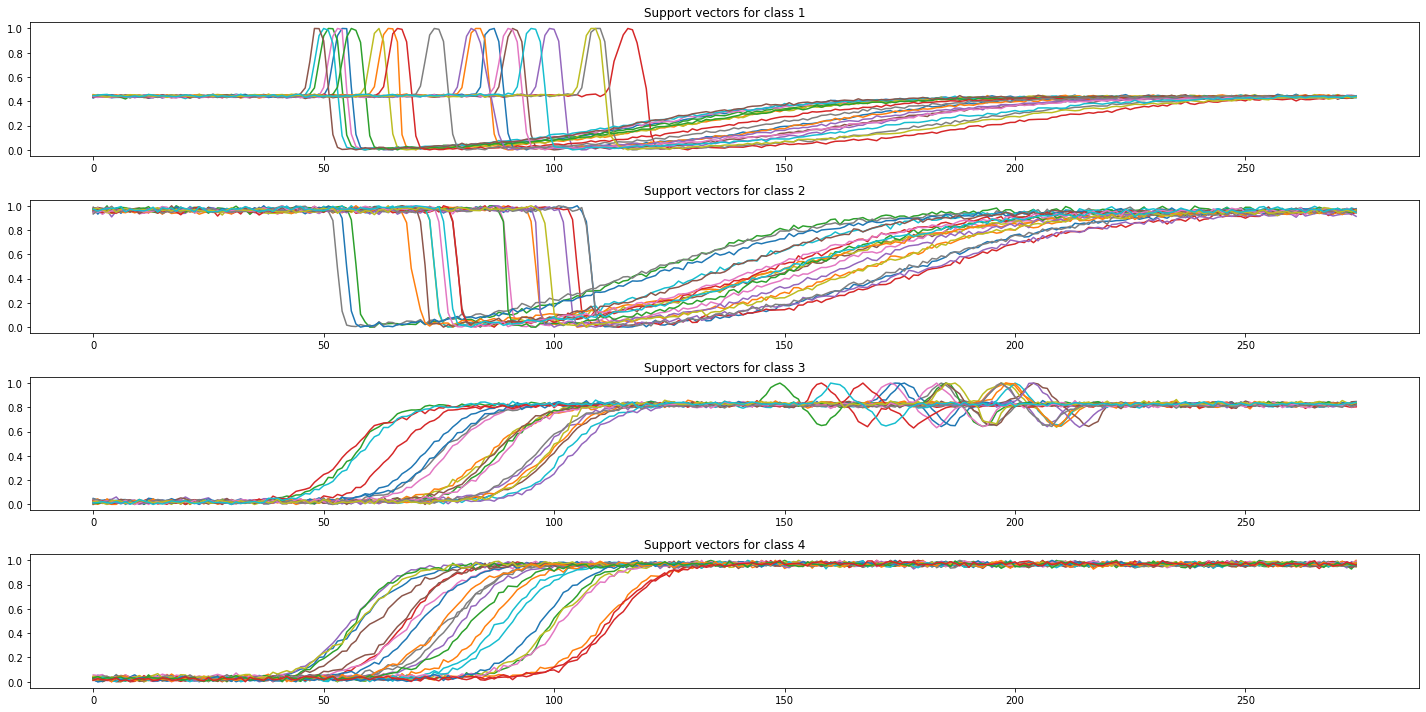

In [36]:
# Dataset: http://www.timeseriesclassification.com/description.php?Dataset=Trace
# Code: https://tslearn.readthedocs.io/en/stable/auto_examples/classification/plot_svm.html#sphx-glr-auto-examples-classification-plot-svm-py
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.svm import TimeSeriesSVC

numpy.random.seed(0)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

clf = TimeSeriesSVC(kernel="gak", gamma=.1)
clf.fit(X_train, y_train)
print("Correct classification rate:", clf.score(X_test, y_test))

n_classes = len(set(y_train))

plt.figure()
plt.figure(figsize=(20, 10))
support_vectors = clf.support_vectors_
for i, cl in enumerate(set(y_train)):
    plt.subplot(n_classes, 1, i + 1)
    plt.title("Support vectors for class %d" % cl)
    for ts in support_vectors[i]:
        plt.plot(ts.ravel())

plt.tight_layout()
plt.show()